In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def t2s(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread("lena.jpg")

#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [3]:
print(img.shape)

(512, 512, 3)


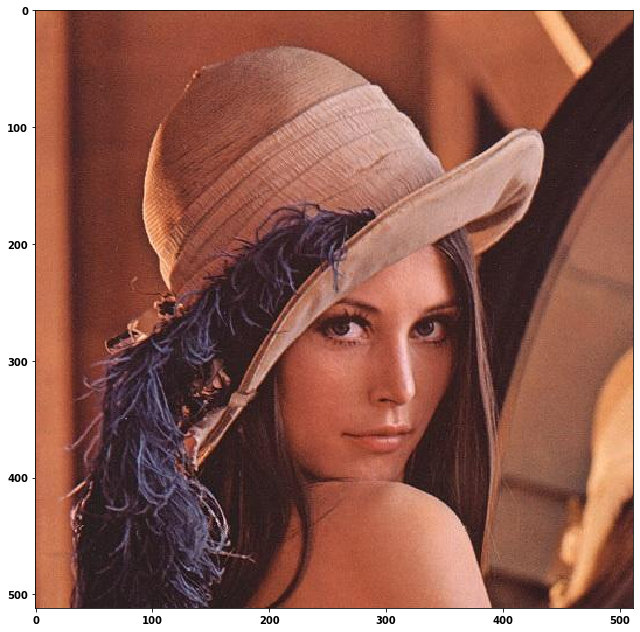

In [4]:
plt.figure(figsize=(11, 11))
plt.imshow(t2s(img))

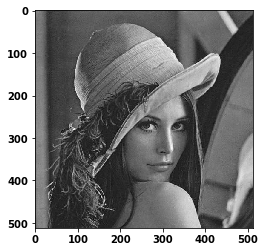

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
reverse_c = img.copy()

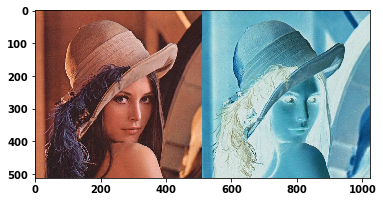

In [14]:
rows = img.shape[0]
cols = img.shape[1]
deeps = img.shape[2]
for i in range(rows):
    for j in range(cols):
        for k in range(deeps):
            reverse_c[i][j][k] = 255 - reverse_c[i][j][k]
            
plt.imshow(t2s(cv2.hconcat([img, reverse_c])))

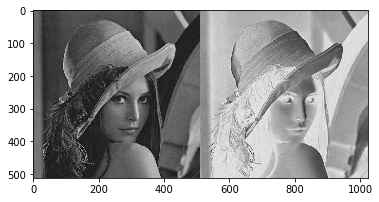

In [8]:
reverse_g = gray.copy()
rows1 = gray.shape[0]
cols1= gray.shape[1]
for i in range(rows1):
    for j in range(cols1):
        reverse_g[i][j] = 255 - reverse_g[i][j]
        
plt.imshow(t2s(cv2.hconcat([gray, reverse_g])))

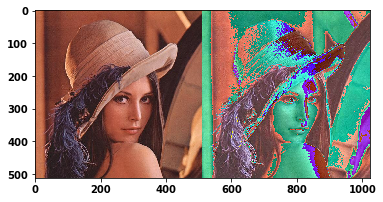

In [19]:
# gamma变换
gamma_c = img.copy()
rows2 = gamma_c.shape[0]
cols2 = gamma_c.shape[1]
deeps2 = gamma_c.shape[2]

for i in range(rows2):
    for j in range(cols2):
        for k in range(deeps2):
            gamma_c[i][j][k] = 3 * pow(gamma_c[i][j][k], 0.9)
    
plt.imshow(t2s(cv2.hconcat([img, gamma_c])))

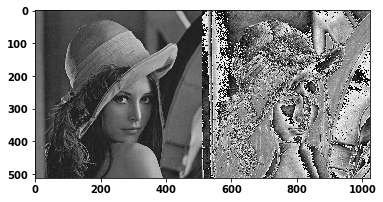

In [21]:
gamma_c1 = gray.copy()
rows3 = gamma_c1.shape[0]
cols3 = gamma_c1.shape[1]

for i in range(rows3):
    for j in range(cols3):
        gamma_c1[i][j] = 3 * pow(gamma_c1[i][j], 1.1)
        
plt.imshow(t2s(cv2.hconcat([gray, gamma_c1])))        

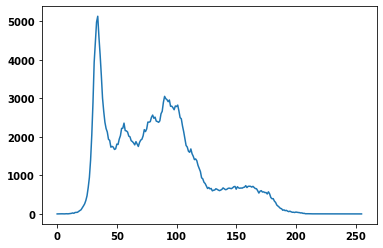

In [24]:
# 直方图
import numpy as np
hist = np.zeros(256)
rows4 = img.shape[0]
cols4 = img.shape[1]
for i in range(rows4):
    for j in range(cols):
        tmp = gray[i][j] # 取每个像素的值
        hist[tmp] = hist[tmp] + 1 # 叠加
  
plt.plot(hist)

0
(256,)


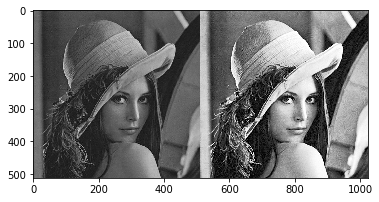

In [36]:
# 直方图均衡化
trans = hist / (rows4*cols4) * 255 # 归一化
for i in range(1, len(trans)):  # (1,256)
    trans[i] = trans[i-1] + trans[i]  # 直方图均衡
    
print(int(trans[0]))
print(trans.shape)


gray_h = gray.copy()
for i in range(rows4):
    for j in range(cols4):
        gray_h[i][j] = int(trans[gray[i][j]])  # 更新像素值
    
plt.imshow(cv2.hconcat([gray, gray_h]), cmap='gray')   

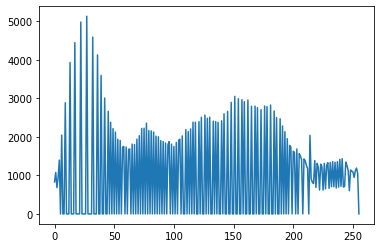

In [38]:
hist_h = np.zeros(256)
for i in range(rows):
    for j in range(cols):
        tmp = gray_h[i][j] # 取每个位置像素值
        hist_h[tmp] = hist_h[tmp] + 1
        
plt.plot(hist_h)        